# Problem set 3

[your name] Luis Ruben Gonzalez Marquez

[working title of the project] Timing of social conflicts in Latin America under neoliberalism: the effect of different forms and outcomes of repression

[date] March 11, 2020

## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what the categories are if you have a categorical hypothesis)
    
    **1. The time length of social conflicts in Latin America under a neoliberal context (dependent variable) will possitively increase dependending on the degree of repression it faces, from null to lethal (independent variable).
    **2. The time lengh of social conflicts in Latin America under a neoliberal context (dependent variable) will possitively increase the greater the violence consequences of lethal repression in number of deaths in the event (independet variable).
    
  
    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. sequential dummies, 3. splines, 4. quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you think your hypothesized relationships will or will not take.
    
    **1. For the first hypothesis, I expect that the relationship takes a nominal form, by comparing conflicts with no repression (omitted category) with the two categorizations of repression as non-lethal and leathal.
    **2. For the second hypothesis, I expect that the relationship  of time length of social conflicts in neoliberal Latin America per number of deaths does not follow a significant sequential dummies non-linear relationship.  
    
    C. State your explanation why (theory) you make the predictions in A. and B.
    **Both hypothesis follow social movements theories on the effects of violence and threats over mobilization: the greater the perceived threat, in this case repression from state or other antagonists, the greater the likelihood of engaging in action that contends it. Our premise for the first hypothesis is that in a context of neoliberal shift and recent formal democratization process (such as in Latin American context), the character of the response (whether there is repression and if its lethal) of those anatagonist to conflict affects its time lenght. And for the second hypothesis,that the number of victims of lethal repression under those circumstances will also affect the perception of threat and thus increase the time lenght of conflicts.    

    D. Tell us the source of your data and describe its sample.
    **The analysis is based in the latest version of Social Conflict Analysis Database (SCAD) of Latin America, hosted by the Robert Strauss Center for International Security and Law, University of Texas at Austin. It includes information of 5,602 conflict events in Mexico, Central America and the Caribbean countries between 1990 and 2017. As a limitation, we can detect a bias to overemphasize urban conflicts and the exclusion of South American countries. 
   

## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

In [1]:
qui set more off
qui capture log close
*qui log using problemset3Rub_20200310.smcl
qui insheet using SCAD2018LatinAmerica_Final.csv, clear
qui keep if ndeath >=0
qui keep ndeath duration repress

In [2]:
label define repressi 0 "No repression" 1 "Non-lethal repression" 2 "Lethal repression"
label values repress repressi

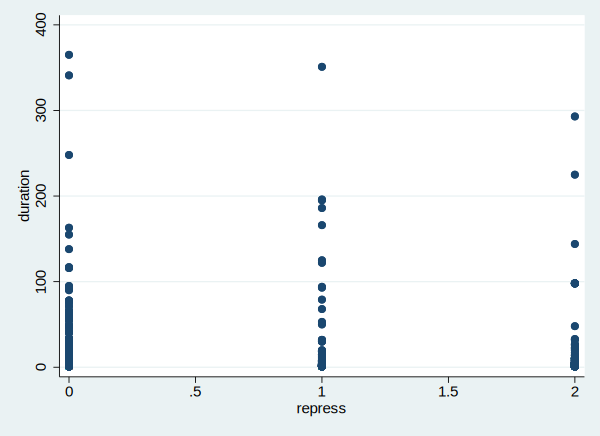






              repress |      Freq.     Percent        Cum.
----------------------+-----------------------------------
        No repression |      4,618       83.57       83.57
Non-lethal repression |        585       10.59       94.15
    Lethal repression |        323        5.85      100.00
----------------------+-----------------------------------
                Total |      5,526      100.00


In [3]:
tw scat duration repress
tab repress







  Variables that uniquely identify margins: repress


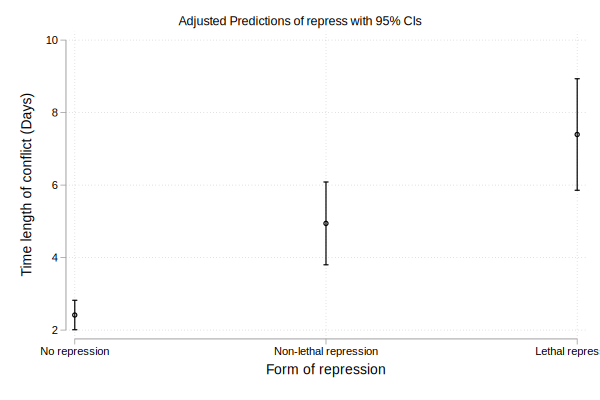

In [4]:
xi i.repress, noomit
qui xi: reg duration ib0.repress
set scheme plotplainblind
quietly margins i.repress, atmeans
marginsplot, unique recast(scatter) ytitle(Time length of conflict (Days)) xtitle (Form of repression) ///
xlab (0 "No repression" 1 "Non-lethal repression" 2 "Lethal repression")

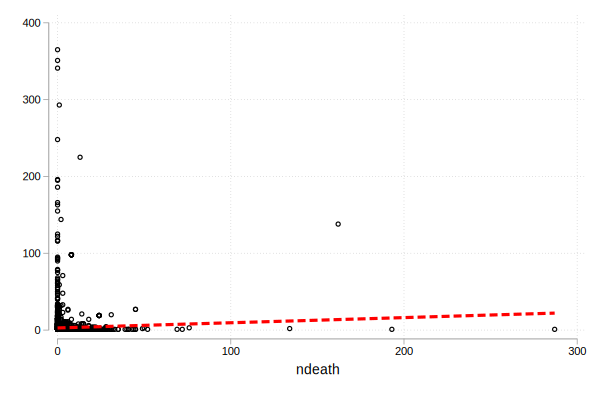

In [5]:
tw (scatter duration ndeath, sort) (lfit duration ndeath, color(red) lwidth(thick)), legend(off) name(linear, replace)
egen ndeathcat1 = cut(ndeath), at(0,1,5,10,15,20,30,50,75,100,150,200, 300)





  Variables that uniquely identify margins: ndeathcat1


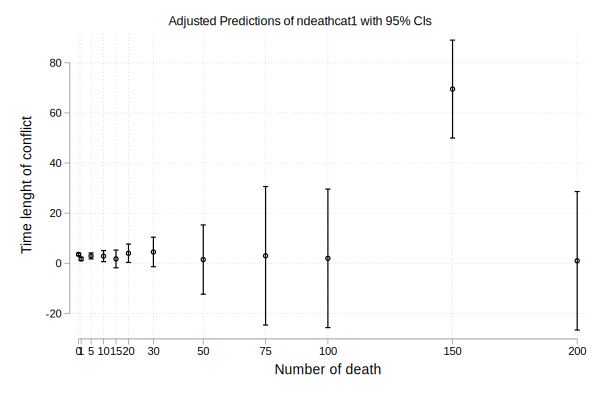

In [6]:
qui xi: reg duration ib1.ndeathcat1
qui margins i.ndeathcat1, atmeans
marginsplot, unique recast(scatter) ytitle(Time lenght of conflict) xtitle (Number of deaths)

In [8]:
keep if ndeath <=100
keep if duration <=100
tw (scatter duration ndeath, sort) (lfit duration ndeath, color(red) lwidth(thick)), legend(off) name(linear, replace)
egen ndeathcat2 = cut(ndeath), at(0,1,5,10,15,20,25,30,35,40,45,50,60,70,80,90,100)





  Variables that uniquely identify margins: ndeathcat2


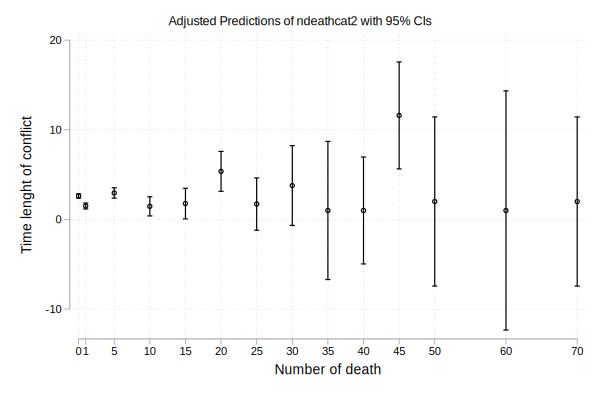

In [9]:
qui xi: reg duration ib1.ndeathcat2
qui margins i.ndeathcat2, atmeans
marginsplot, unique recast(scatter) ytitle(Time lenght of conflict) xtitle (Number of deaths)

## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    **The results of the tests support the first hypothesis and present some challenges for the second hypothesis. In the first case, when comparing the adjusted predictions of conflicts without repression against those with repression, the average time lenght for conflict episodes increased. If the episode presented non-lethal repression, it increased from 2.2 to 4.4 days of duration, and if there was lethal repression, it moved from 2.2 to 6.5 days. 
    **For the second hypothesis, when comparing the fitted line with the sequence of dummies that grouped the number of deaths in the whole sample (using ndeathcat1 as sequence categorization), the differences in the rate changes suggest pattern of time decrease in the critical threshold of 0 deaths to 1 deaths, then a slow increase in time length and larger increases in the extreme values of number of deaths. When excluding outlying extreme observations of the outcome of time (no more than a 100 days) and the input of number deaths (no more than a hundred of deaths), and also using a sequence categorization adjusted to shorter values (ndeathcat2), the aforementioned results are confirmed. There is a reduction in the average time length from 0 deaths to 1 death, then an increase of time from 2 to 5 death, a decrease from 5 to 10, a substantial increase in time from 15 to 20 death, a decrease in time from 20 to 25 and the most relevant increase (over the barrier of 10 days of conflict duration) from 40 to 45 deaths followed by a decrease in time when moving from 45 to 50.  
    
    B. Say whether a linear or particular non-linear model best describes your data and why
    In consequence, the effect of repression over time length of social conflicts in Latin America under a neoliberal context is better describe in non-linear models. A dummy comparison of non-repression episodes against episodes with non-lethal and non-lethal repression allows to assess its effect increasing the average days of the conflicts. However, this may not lead to think in a linear relationship of the threat of violence over duration of conflicts in the region: the results suggests that how lethal violence has affected duration of conflicts is non-linear and complex. What is more, moving from non deaths to one single death is associated with lesser duration of conflicts, although the overall relationship is of direct proportional increase. The sequence of dummies helps describe a pattern of reductions or enlargment in conflict time lenght according to the relative number of deaths in social conflicts in Latin America over the last two decades. 
    